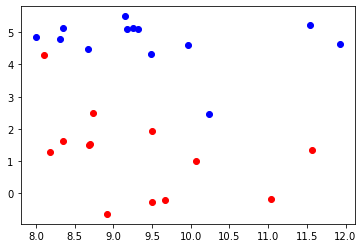

In [10]:
# %reset
# pip install mlxtend

import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions # Decision Boundary 그리기
import mglearn   # 과학 계산용 그래프 그리기 (선 그래프, 히스토그램, 산점도 등)

# training data set 가져오기
x_data, t_data = mglearn.datasets.make_forge()
# x_data # array([[ 9.96346605,  4.59676542], -> 좌표값
# t_data # array([1, 0, 1, 0

# matplotlib을 이용해서 2차 평면에 점을 찍는다.
# - t_data가 0인 경우 red, 1인 경우 blue 점으로 찍는다.
# - 2차 평면에 점을 찍을 때는 scatter라는 함수를 이용한다.

x_data_red = x_data[t_data==0]
x_data_blue = x_data[t_data==1]

plt.scatter(x_data_red[:,0], x_data_red[:,1], color='r')
plt.scatter(x_data_blue[:,0], x_data_blue[:,1], color='b')
plt.show()

[[ 8.1062269   4.28695977]
 [ 8.7337095   2.49162431]
 [11.563957    1.3389402 ]
 [ 8.67494727  4.47573059]
 [10.24028948  2.45544401]
 [ 7.99815287  4.8525051 ]]


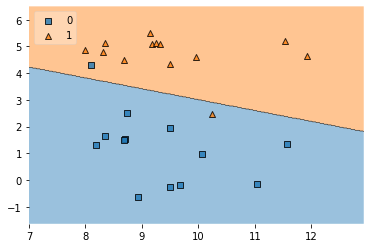

In [19]:
##  sklearn을 이용하여 model 생성
# model = LogisticRegression()
model = SVC(kernel='linear')
model.fit(x_data, t_data)

# SVM은 support vecotr를 구하고 이를 이용해서 Decision Boundaries를 구한다.
# 학습이 끝나면 SVM에 의해서 구해진 support vector의 index를 알아낸다.
print(model.support_vectors_)

plot_decision_regions(X=x_data,
                     y=t_data,
                     clf=model,
                     legend=2) # clf 분류, legend 범례
plt.show()

### SVM으로 BMI

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


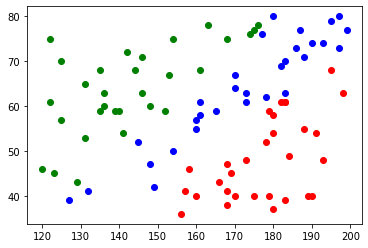

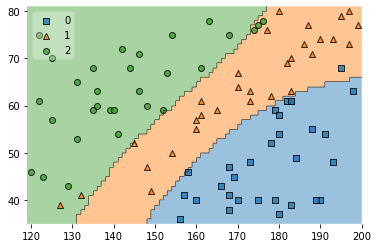

In [15]:
# 201020
# SVM으로 BMI
%reset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC # 분류

# training data set
df = pd.read_csv('./data/bmi.csv', skiprows=3)
# df

x_data = df[['height', 'weight']].values
t_data = df['label'].values

# matplotlib를 이용해서 t_data가 0인 경우 red점, 
# 1인 경우 blue점, 2인 경우 green점으로 표현
# 총 20000개 중에 각각 30개 씩만 뽑아서 그래프를 그린다.

num_of_sample = 30

x_data_red = x_data[t_data==0][:num_of_sample]
t_data_red = t_data[t_data==0][:num_of_sample]

x_data_blue = x_data[t_data==1][:num_of_sample]
t_data_blue = t_data[t_data==1][:num_of_sample]

x_data_green = x_data[t_data==2][:num_of_sample]
t_data_green = t_data[t_data==2][:num_of_sample]

plt.scatter(x_data_red[:,0],x_data_red[:,1], color='r')
plt.scatter(x_data_blue[:,0],x_data_blue[:,1], color='b')
plt.scatter(x_data_green[:,0],x_data_green[:,1], color='g')

plt.show()

# axis=0 => 행 방향/ 행이 진행되는 방향/ 세로 방향 
x_data_sample = np.concatenate((x_data_red,x_data_blue,x_data_green), axis=0)
t_data_sample = np.concatenate((t_data_red,t_data_blue,t_data_green), axis=0)

# sklearn 구현
## gamma값이 커지면 영향력을 행사하는 거리가 줄어든다.
## 정밀하게 Decision Boundaries 형성 -> overfitting
#  gamma값이 작아지면 직선 형태
model = SVC(C=1, 
            gamma=0.001, 
            kernel='rbf')
model.fit(x_data_sample, t_data_sample)

plot_decision_regions(X=x_data_sample,
                      y=t_data_sample,
                      clf=model,
                      legend=2) # 범례 2사분면에 표현
plt.show()